In [11]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
data=pd.read_csv("D:\Magang project\Project 2 MeriSKILL\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

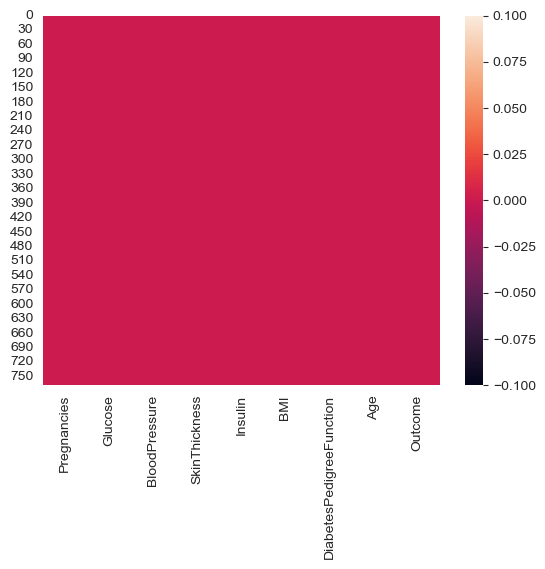

In [51]:
#checking for missing value
sns.heatmap(data.isnull())

In [52]:
#corelation matrix
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

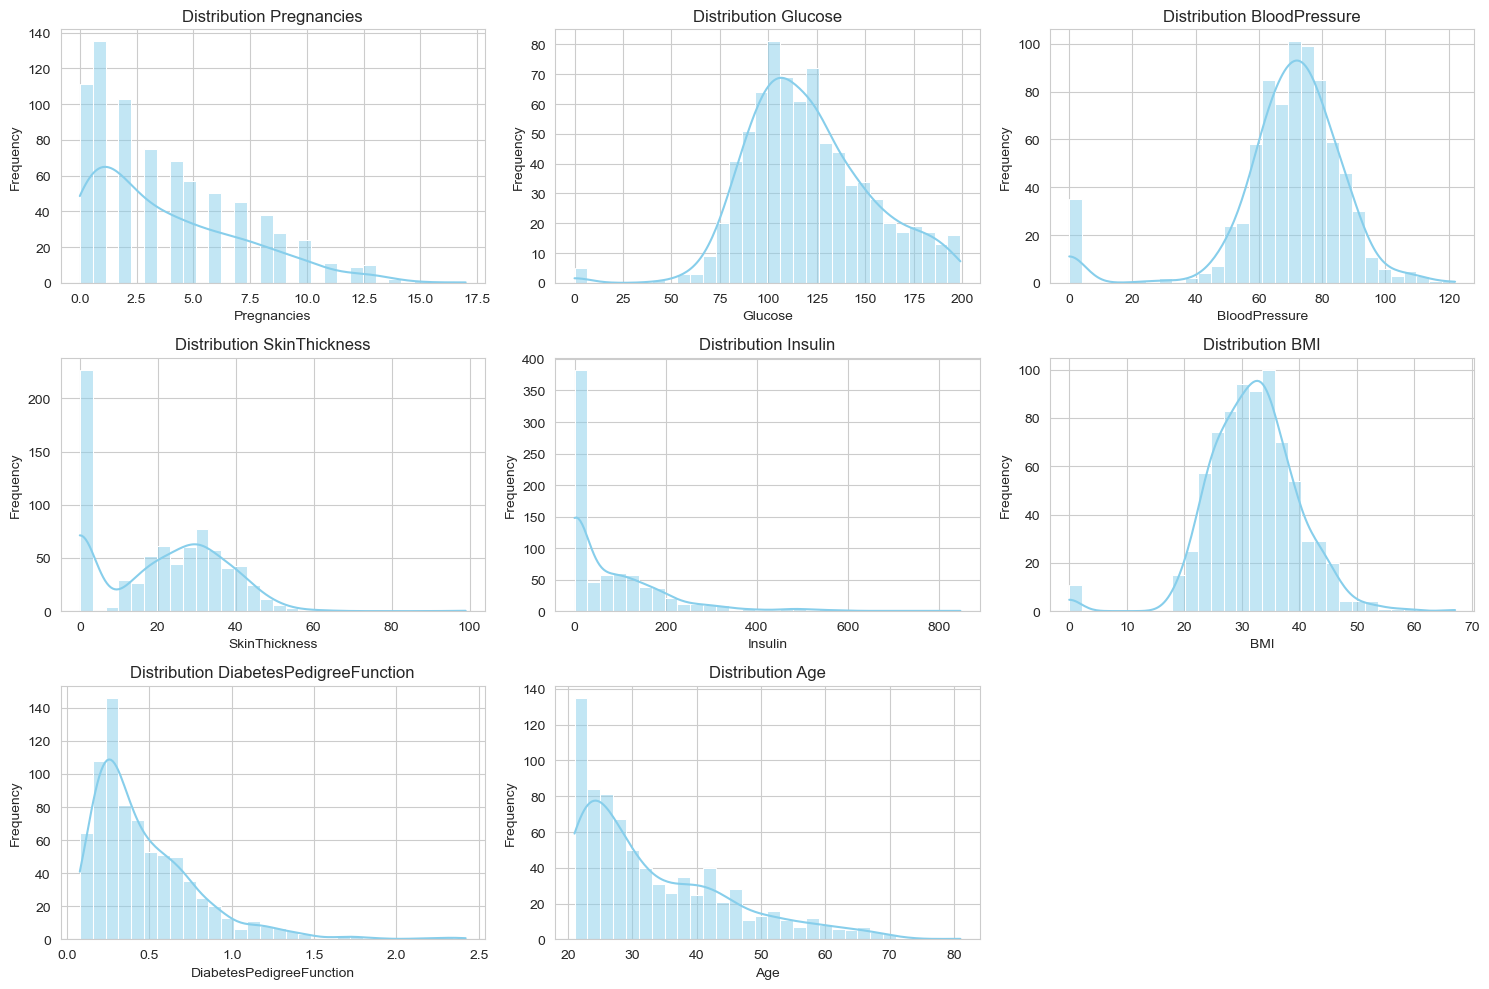

In [53]:
sns.set_style("whitegrid")

#Visualization of the distributions of the variabels
plt.figure(figsize=(15,10))
for i, column in enumerate(data.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


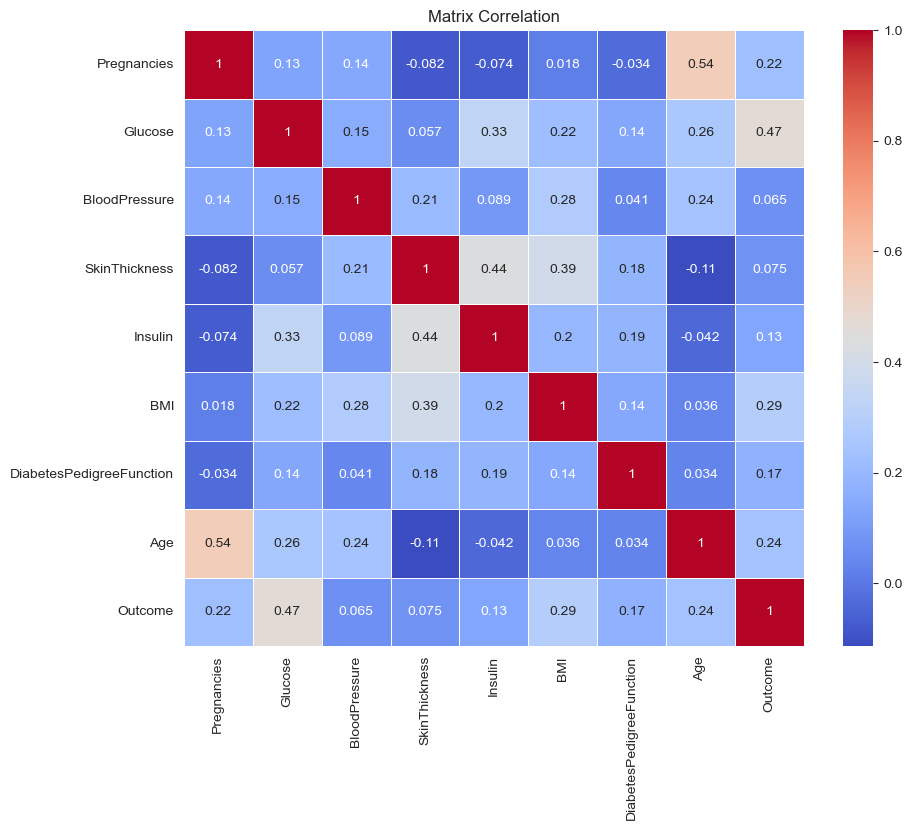

In [54]:
#visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrix Correlation")
plt.show()

In [55]:
#Defeniting columns that have values of 0 that must be treated
columns_with_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

#Replacing 0 values with Nan
for column in columns_with_zeros:
    data[column]=data[column].replace(0, np.nan)
    
#Replacing the Nan with the median of each column
for column in columns_with_zeros:
    data[column].fillna(data[column].median(), inplace=True)
    
#Checking if Nan values still exist in the data set
nan_values = data.isnull().sum()
nan_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
#train test split
X=data.drop("Outcome",axis=1)
Y=data['Outcome']

#Splitting the data set into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

#Standardization of features
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

# Logistic Regression

In [58]:
#training the model
model=LogisticRegression(random_state=42)
model.fit(X_train_scaled,Y_train)

#Predictions on the test set
y_pred = model.predict(X_test_scaled)

#Model evaluation
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report= classification_report(Y_test, y_pred)

accuracy, conf_matrix, class_report

(0.7532467532467533,
 array([[82, 17],
        [21, 34]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

# Random Forest

In [59]:
#creating and training the Random Forest model
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled,Y_train)

#Predictions on the test set
y_rf_pred = rf_model.predict(X_test_scaled)

#Model evaluation
rf_accuracy = accuracy_score(Y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(Y_test, y_rf_pred)
rf_class_report= classification_report(Y_test, y_rf_pred)

rf_accuracy, rf_conf_matrix, rf_class_report

(0.7337662337662337,
 array([[78, 21],
        [20, 35]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

# Decision Tree

In [67]:
# Preprocess the data
#Set values to 0 for the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' columns
columns_with_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in columns_with_zeros:
    data[column].replace(0, data[column].median(), inplace=True)
    
#Split the data set into features (x) and labels (y)
X=data.drop("Outcome",axis=1)
Y=data['Outcome']

#Splitting the data set into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

#Standardization of features
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#creating and training the Random Forest model
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled,Y_train)

#Predictions on the test set
y_dt_pred = dt_model.predict(X_test_scaled)

#Model evaluation
dt_accuracy = accuracy_score(Y_test, y_dt_pred)
dt_class_report= classification_report(Y_test, y_dt_pred)
print("Accuracy:", dt_accuracy)
print("Classification Report:", dt_class_report)

#Importance of Features
feature_importance=dt_model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Accuracy: 0.7272727272727273
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Feature: Pregnancies, Importance: 0.06075661464468774
Feature: Glucose, Importance: 0.3356187205012328
Feature: BloodPressure, Importance: 0.08631253370211535
Feature: SkinThickness, Importance: 0.05500248709903033
Feature: Insulin, Importance: 0.078591582701987
Feature: BMI, Importance: 0.15055221284220968
Feature: DiabetesPedigreeFunction, Importance: 0.10966647017062481
Feature: Age, Importance: 0.12349937833811234


In [24]:
#making prediction
prediction=model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0]


In [26]:
accuracy=accuracy_score(prediction,Y_test)
print(accuracy)

0.7207792207792207
